<a href="https://colab.research.google.com/github/TranNhatHan/LamBt/blob/main/BtPandas4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Câu 1: Xác định các thư viện cần dùng cho quá trình phân tích thống kê mô tả và đưa vào mã lệnh

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Câu 2: Sử dụng tập dữ liệu Aircraft Wildlife Strikes, 1990-2015 để tiến hành phân tích thống kê
mô tả.

In [216]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [224]:
dt = pd.read_csv("/content/drive/MyDrive/database.csv", )
dt.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


Câu 3: Đối với các cột dữ liệu định lượng, hãy áp dụng các phép tính hướng tâm, phép tính phương
sai – độ lệch chuẩn, các phép tính phân vị, cực đại – cực tiểu để tính các thông số cơ bản của các
cột dữ liệu định lượng này.

In [218]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

In [263]:
numeric = pd.DataFrame()
for column in ['Height', 'Speed', 'Distance', 'Fatalities', 'Injuries', 'Engines']:
    numeric[column] = dt[column]

In [236]:
summary = numeric.describe()
var = pd.DataFrame([numeric.var()], index = ["var"])
summary.append(var)

,Height,Speed,Distance,Fatalities,Injuries,Engines
count,1.036770e+05,71258.000000,99713.000000,565.000000,229.000000,127342.000000
mean,8.310323e+02,141.925622,0.703738,0.046018,1.746725,2.057656
std,1.803651e+03,46.905651,3.464467,0.435164,6.571239,0.469374
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000e+00,120.000000,0.000000,0.000000,1.000000,2.000000
50%,5.000000e+01,138.000000,0.000000,0.000000,1.000000,2.000000
75%,8.000000e+02,160.000000,0.000000,0.000000,1.000000,2.000000
max,3.130000e+04,2500.000000,150.000000,8.000000,100.000000,4.000000
var,3.253156e+06,2200.140138,12.002534,0.189368,43.181184,0.220312


Câu 4: Hãy vẽ biểu đồ boxplot cho từng cột dữ liệu định lượng và xác định xem có xuất hiện các
ngoại lệ không?nếu có thì ở cột nào?

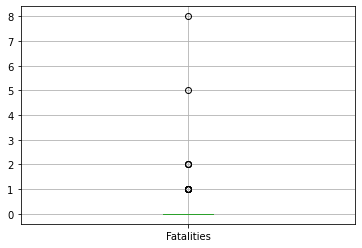

In [245]:
dt.boxplot(column = 'Fatalities')

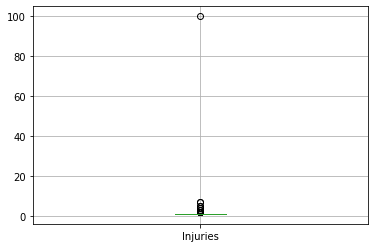

In [246]:
dt.boxplot(column ='Injuries')

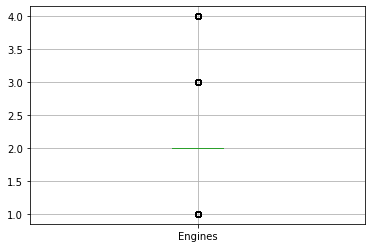

In [242]:
dt.boxplot(column = 'Engines')

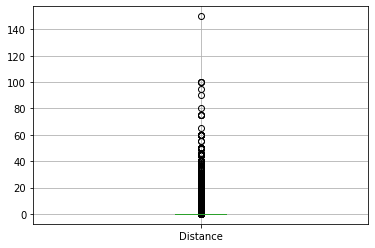

In [244]:
dt.boxplot(column = 'Distance')

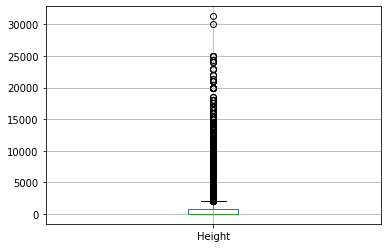

In [12]:
dt.boxplot(column = 'Height')

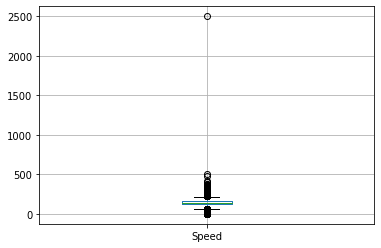

In [13]:
dt.boxplot(column = 'Speed')

Ta thấy các cột Distance, Speed, Height là các cột có giá trị ngoại lệ

Câu 5: Người ta thường sử dụng chỉ số z (hay z-score) để xác định giá trị ngoại lệ (outlier). Bạn
hãy loại bỏ các hàng có chứa giá trị ngoại lệ ra khỏi dataframe.

In [260]:
temp = pd.DataFrame()
for column in ['Height', 'Speed', 'Distance']:
    mean = dt[column].mean(skipna=True)
    temp[column] = dt[column].fillna(mean)

In [261]:
ndt = dt[(np.abs(stats.zscore(temp)) < 3).all(axis=1)]

In [264]:
numeric = numeric[(np.abs(stats.zscore(temp)) < 3).all(axis=1)]

Câu 6: Thực hiện lại câu 3 – 4 với tập dữ liệu sau khi đã loại bỏ ngoại lệ.

In [265]:
summary = numeric.describe()
var = pd.DataFrame([numeric.var()], index = ["var"])
summary.append(var)

,Height,Speed,Distance,Fatalities,Injuries,Engines
count,95358.000000,63744.000000,95422.000000,564.000000,224.000000,119080.000000
mean,470.072936,134.931084,0.193398,0.044326,1.763393,2.057667
std,904.337942,33.477115,0.929543,0.433688,6.643538,0.467999
min,0.000000,52.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,120.000000,0.000000,0.000000,1.000000,2.000000
50%,20.000000,135.000000,0.000000,0.000000,1.000000,2.000000
75%,500.000000,150.000000,0.000000,0.000000,1.000000,2.000000
max,5000.000000,230.000000,8.500000,8.000000,100.000000,4.000000
var,817827.113350,1120.717196,0.864050,0.188085,44.136591,0.219023


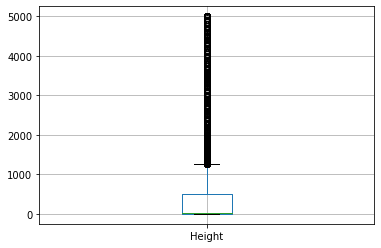

In [266]:
ndt.boxplot(column = 'Height')

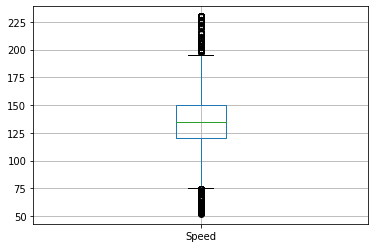

In [267]:
ndt.boxplot(column = 'Speed')

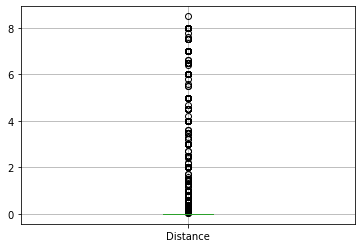

In [268]:
ndt.boxplot(column = 'Distance')

Câu 7: Hãy tính độ tương quan (correlation) giữa các cột định lượng. (Hay xây dựng correlation
matrix)

In [272]:
correlation = numeric.corr(method='pearson')
correlation

,Height,Speed,Distance,Fatalities,Injuries,Engines
Height,1.000000,0.569714,0.882518,0.087911,0.116126,0.012914
Speed,0.569714,1.000000,0.455881,0.252752,0.215640,0.294138
Distance,0.882518,0.455881,1.000000,0.980543,0.197284,-0.011351
Fatalities,0.087911,0.252752,0.980543,1.000000,NaN,-0.168305
Injuries,0.116126,0.215640,0.197284,NaN,1.000000,0.106129
Engines,0.012914,0.294138,-0.011351,-0.168305,0.106129,1.000000


Câu 8: Từ correlation matrix, Hãy vẽ:
- Heat map (biểu đồ nhiệt)
- Pair plot (biểu đồ cặp)

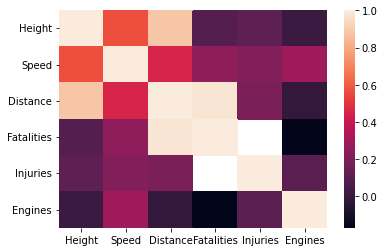

In [273]:
ax = sns.heatmap(correlation)

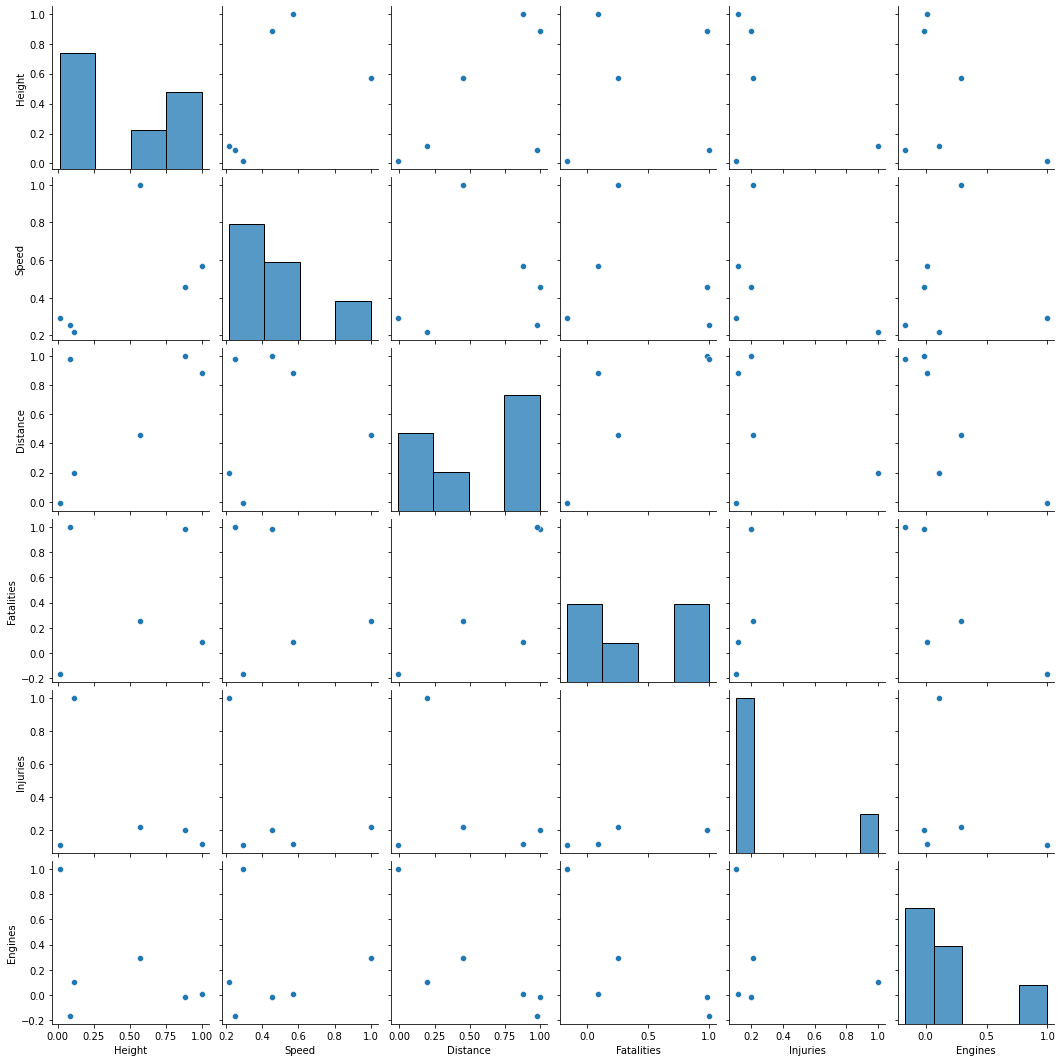

In [274]:
sns.pairplot(correlation)

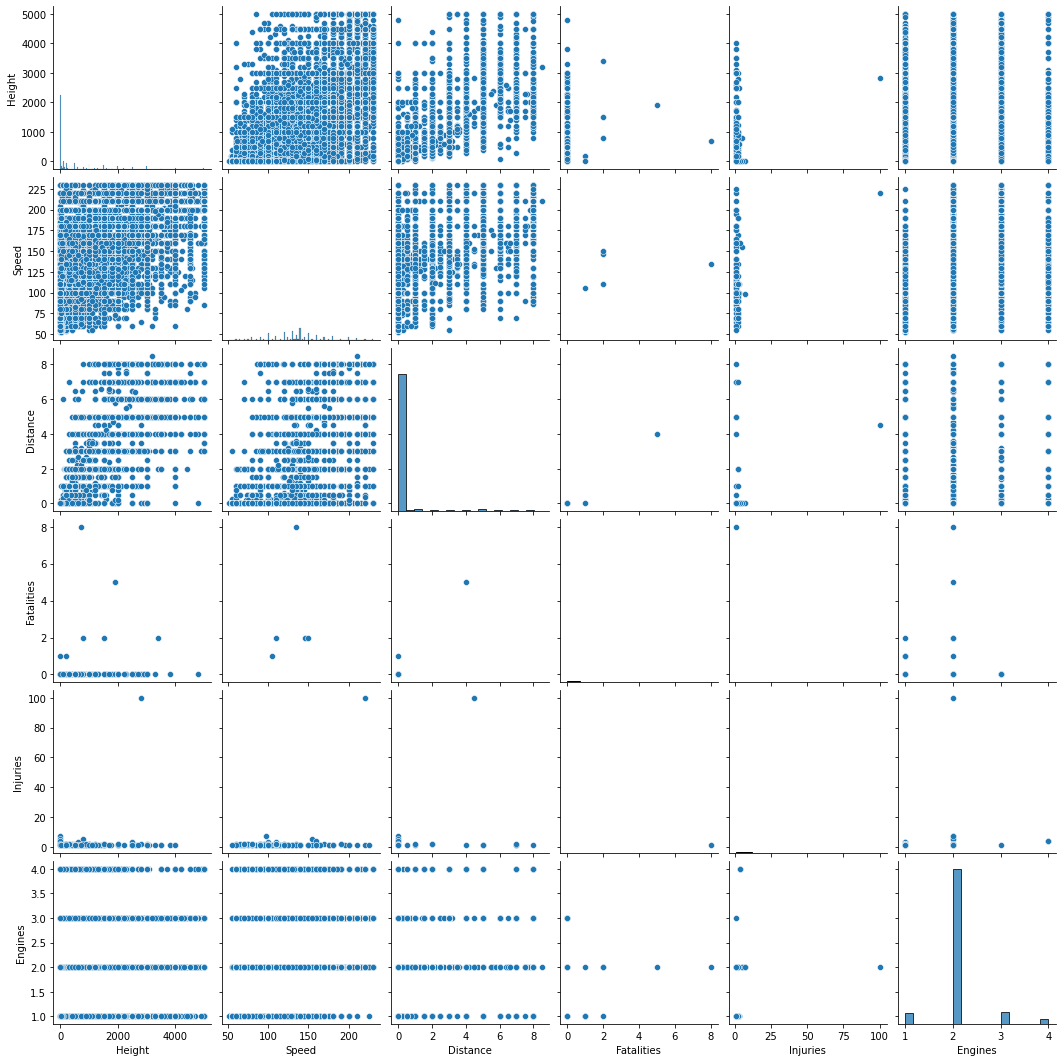

In [275]:
sns.pairplot(numeric)

Câu 9: Đối với các cột dữ liệu định tính, hãy:
- Vẽ biểu đồ cột dạng đứng
- Vẽ biểu đồ cột dạng ngang
- Vẽ biểu đồ đường tròn
- Vẽ biểu đồ Pareto

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

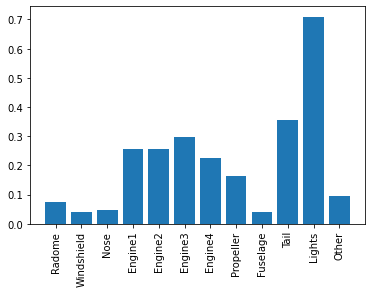

In [283]:
strike_damage = {}
for column in ndt.columns:
    col_sep = column.split(' ')
    if len(col_sep) > 1 and col_sep[1] == 'Strike':
        strike_damage[col_sep[0]] = ndt[col_sep[0] + ' Damage'].sum() / ndt[column].sum()                        
#Airplane part probability to be damaged
plt.bar(list(strike_damage.keys()),list(strike_damage.values()))
plt.xticks(rotation=90)

<BarContainer object of 15 artists>

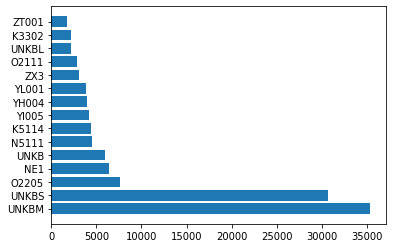

In [286]:
birds=dict(ndt['Species ID'].value_counts(ascending=False))

x = list(birds.keys())[:15]
y = list(birds.values())[:15]
plt.barh(x,y)

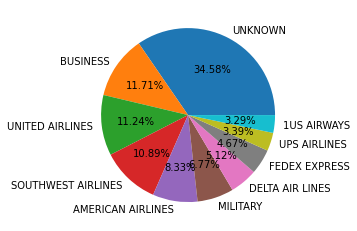

In [310]:
operator_counts = ndt.Operator.value_counts()
operators = operator_counts.index
counts = operator_counts.values
cumperc = counts.cumsum()/counts.sum()*100
plt.xticks(rotation=90)
plt.pie(counts[:10], labels = operators[:10], autopct='%1.2f%%')
plt.show()

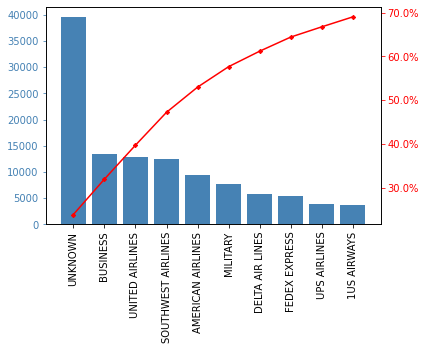

In [332]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 3

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(operators[:10], counts[:10], color=color1)
plt.xticks(rotation=90)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(operators[:10], cumperc[:10], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()